<a href="https://colab.research.google.com/github/Memento2121/SeaStateForcastDL/blob/main/PatchTST(336%2C96)_SingleFeature_Weather_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and process the csv dataset

## Preprocessing and Visualization

In [1]:
import pandas as pd

# Dataset URL (CSV format)
url = "https://raw.githubusercontent.com/Memento2121/SeaStateForcastDL/main/data/weather.csv"
# Load data
df = pd.read_csv(url)

display(df.head())

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [2]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  52696 non-null  object 
 1   p (mbar)              52696 non-null  float64
 2   T (degC)              52696 non-null  float64
 3   Tpot (K)              52696 non-null  float64
 4   Tdew (degC)           52696 non-null  float64
 5   rh (%)                52696 non-null  float64
 6   VPmax (mbar)          52696 non-null  float64
 7   VPact (mbar)          52696 non-null  float64
 8   VPdef (mbar)          52696 non-null  float64
 9   sh (g/kg)             52696 non-null  float64
 10  H2OC (mmol/mol)       52696 non-null  float64
 11  rho (g/m**3)          52696 non-null  float64
 12  wv (m/s)              52696 non-null  float64
 13  max. wv (m/s)         52696 non-null  float64
 14  wd (deg)              52696 non-null  float64
 15  rain (mm)          

None

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


In [3]:
# Change date to the right format

df['time'] = pd.to_datetime(df['date'])
df = df.drop(columns=['date'])

# make the time column first

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

display(df.head())

,time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [4]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  52696 non-null  datetime64[ns]
 1   p (mbar)              52696 non-null  float64       
 2   T (degC)              52696 non-null  float64       
 3   Tpot (K)              52696 non-null  float64       
 4   Tdew (degC)           52696 non-null  float64       
 5   rh (%)                52696 non-null  float64       
 6   VPmax (mbar)          52696 non-null  float64       
 7   VPact (mbar)          52696 non-null  float64       
 8   VPdef (mbar)          52696 non-null  float64       
 9   sh (g/kg)             52696 non-null  float64       
 10  H2OC (mmol/mol)       52696 non-null  float64       
 11  rho (g/m**3)          52696 non-null  float64       
 12  wv (m/s)              52696 non-null  float64       
 13  max. wv (m/s)   

None

,time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
count,52696,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,2020-07-02 00:11:52.198269440,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
min,2020-01-01 00:10:00,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,2020-04-01 11:47:30,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,2020-07-02 00:45:00,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,2020-10-01 12:22:30,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,2021-01-01 00:00:00,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000
std,NaN,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015


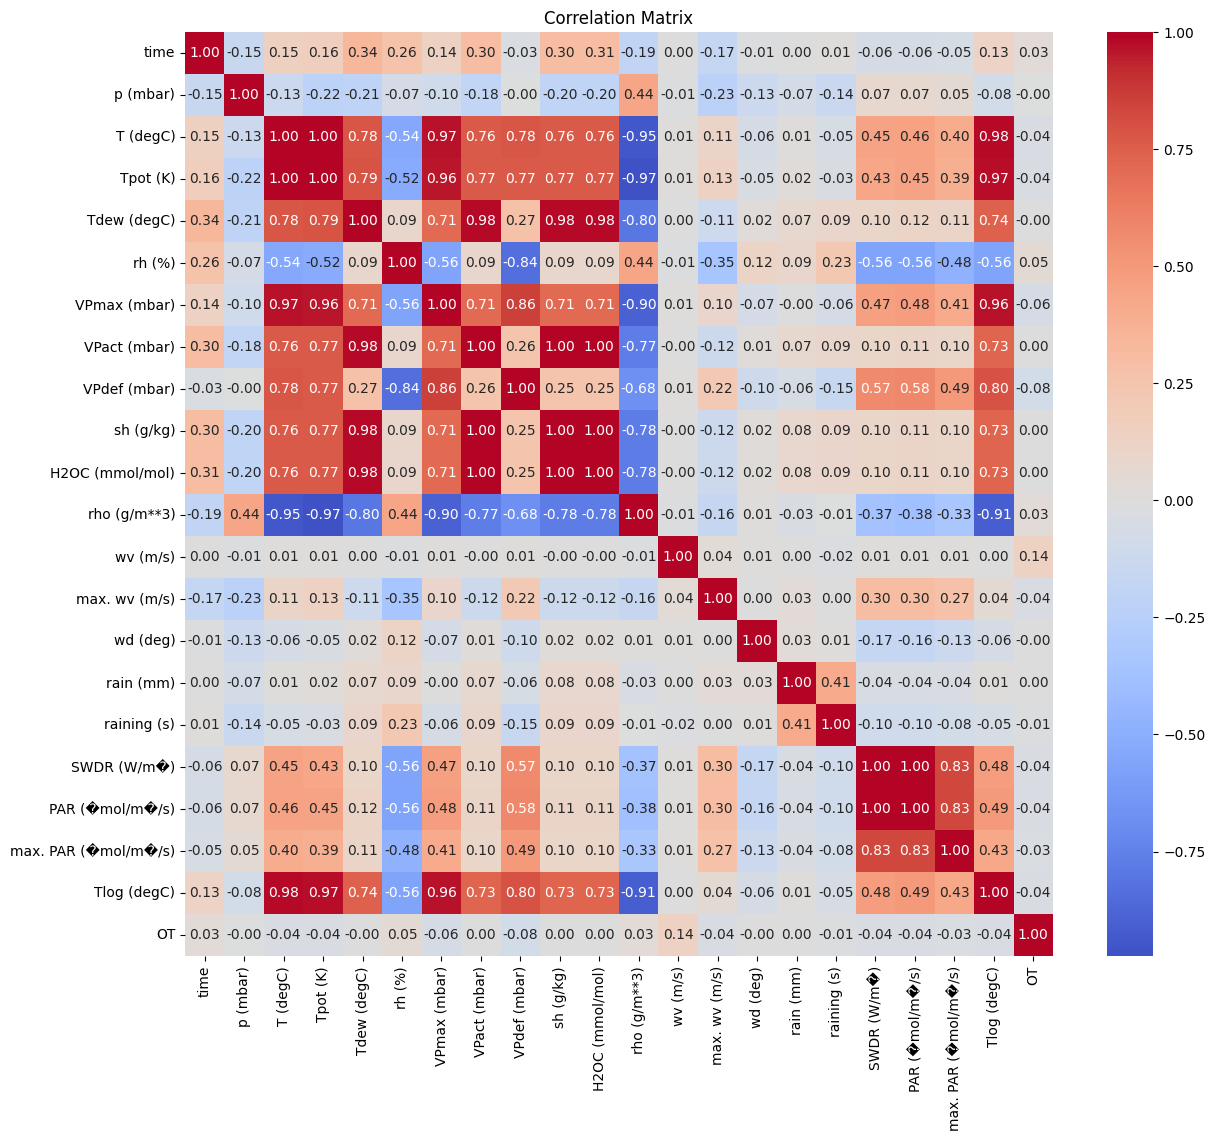

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [6]:
"""
import numpy as np
import pandas as pd

# Assume df['time'] is already a datetime column
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month

# Create cyclical features for hour: 24 hours in a day
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Create cyclical features for month: 12 months in a year
# Subtract 1 to start from 0
df['month_sin'] = np.sin(2 * np.pi * (df['month'] - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['month'] - 1) / 12)

display(df[['time', 'hour', 'hour_sin', 'hour_cos', 'month', 'month_sin', 'month_cos']].head())

# Full Corelation Matrix

corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()
"""

'\nimport numpy as np\nimport pandas as pd\n\n# Assume df[\'time\'] is already a datetime column\ndf[\'hour\'] = df[\'time\'].dt.hour\ndf[\'month\'] = df[\'time\'].dt.month\n\n# Create cyclical features for hour: 24 hours in a day\ndf[\'hour_sin\'] = np.sin(2 * np.pi * df[\'hour\'] / 24)\ndf[\'hour_cos\'] = np.cos(2 * np.pi * df[\'hour\'] / 24)\n\n# Create cyclical features for month: 12 months in a year\n# Subtract 1 to start from 0\ndf[\'month_sin\'] = np.sin(2 * np.pi * (df[\'month\'] - 1) / 12)\ndf[\'month_cos\'] = np.cos(2 * np.pi * (df[\'month\'] - 1) / 12)\n\ndisplay(df[[\'time\', \'hour\', \'hour_sin\', \'hour_cos\', \'month\', \'month_sin\', \'month_cos\']].head())\n\n# Full Corelation Matrix\n\ncorr_matrix = df.corr()\n\nplt.figure(figsize=(14, 12))\nsns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)\nplt.title("Correlation Matrix")\nplt.show()\n'

## Choose Target

In [7]:
# Select Target Column
tar_col ='Tpot (K)'
#tar_col ='p (mbar)'


# Only select the time and tar_col from df
multi = False
#multi = True

if multi == False:
  df = df[['time', tar_col]]
  display(df.head())


target_idx = df.columns.get_loc(tar_col) - 1

df = df.drop(columns=['time'])

print("Target column index:", target_idx)

display(df.info())

display(df.describe())

,time,Tpot (K)
0,2020-01-01 00:10:00,273.18
1,2020-01-01 00:20:00,273.22
2,2020-01-01 00:30:00,273.21
3,2020-01-01 00:40:00,272.86
4,2020-01-01 00:50:00,272.82


Target column index: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tpot (K)  52696 non-null  float64
dtypes: float64(1)
memory usage: 411.8 KB


None

,Tpot (K)
count,52696.000000
mean,284.796938
std,7.616995
min,266.190000
25%,278.550000
50%,284.320000
75%,290.260000
max,309.130000


In [8]:
# Do a 7:1:2 Split Chronologically

train_size = int(0.7 * len(df))
val_size = int(0.1 * len(df))
test_size = len(df) - train_size - val_size

df_train = df[:train_size]
df_val = df[train_size:train_size+val_size]
df_test = df[train_size+val_size:]

print("Train size:", df_train.shape)
print("Validation size:", df_val.shape)
print("Test size:", df_test.shape)

Train size: (36887, 1)
Validation size: (5269, 1)
Test size: (10540, 1)


# Building the Dataset




In [9]:
# Context and Forected windows

context_seq_size = int(336)
forecasted_seq_size = int(96)
feature_num = int(df.shape[1])

print("Context window size:", context_seq_size)
print("Forecasted window size:", forecasted_seq_size)
print("Number of features:", feature_num)

Context window size: 336
Forecasted window size: 96
Number of features: 1


In [10]:
import numpy as np

# Steps of size : Choose to overlap or not
step_size_generation = forecasted_seq_size # Prediction Plots
step_size = 1 # Full Overlapping

def create_sliding_windows(df, input_len=context_seq_size, output_len=forecasted_seq_size, target_col=tar_col, step_size=step_size):
    """
    df: DataFrame with numeric features (no time col)
    input_len: number of past time steps
    output_len: number of future time steps
    target_col: column to predict
    Returns: X, y arrays for model training
    """
    X, y = [], []
    total_len = input_len + output_len
    # Use a step equal to input_len to allow overlapping windows.
    for i in range(0, len(df) - total_len + 1, step_size):
        x_window = df.iloc[i:i+input_len].values
        y_window = df[target_col].iloc[i+input_len:i+total_len].values
        X.append(x_window)
        y.append(y_window)
    return np.array(X), np.array(y)

def create_sliding_windows_full_features(df, input_len=context_seq_size, output_len=forecasted_seq_size, step_size=step_size):
    """
    df: DataFrame with numeric features (no time col)
    input_len: number of past time steps
    output_len: number of future time steps
    Returns: X, Y arrays for model training
    """
    X, Y = [], []
    total_len = input_len + output_len
    # Use a step equal to input_len to allow overlapping windows.
    for i in range(0, len(df) - total_len + 1, step_size):
        x_window = df.iloc[i:i+input_len].values
        y_window = df.iloc[i+input_len:i+total_len].values
        X.append(x_window)
        Y.append(y_window)
    return np.array(X), np.array(Y)



In [11]:
# Build sliding windows

X, Y = create_sliding_windows_full_features(df_train, input_len=context_seq_size, output_len=forecasted_seq_size)

X_val, Y_val = create_sliding_windows_full_features(df_val, input_len=context_seq_size, output_len=forecasted_seq_size)

X_test, Y_test = create_sliding_windows_full_features(df_test, input_len=context_seq_size, output_len=forecasted_seq_size)

print("X shape:", X.shape)
print("y shape:", Y.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", Y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X shape: (36456, 336, 1)
y shape: (36456, 96, 1)
X_val shape: (4838, 336, 1)
y_val shape: (4838, 96, 1)
X_test shape: (10109, 336, 1)
y_test shape: (10109, 96, 1)


# Rescaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

# Rescale the Data By fitting a StandardScaler on the training Set

scaler = StandardScaler()
X_fit = df_train.values
print(X_fit.shape)
scaler.fit(X_fit)

X_reshaped = X.reshape(X.shape[0] * X.shape[1], X.shape[2])
X_rescaled = scaler.transform(X_reshaped)
X_rescaled = X_rescaled.reshape(X.shape[0], X.shape[1], X.shape[2])

Y_reshaped = Y.reshape(Y.shape[0] * Y.shape[1], Y.shape[2])
Y_rescaled = scaler.transform(Y_reshaped)
Y_rescaled = Y_rescaled.reshape(Y.shape[0], Y.shape[1], Y.shape[2])

print("X_rescaled shape:", X_rescaled.shape)
print("y_rescaled shape:", Y_rescaled.shape)

X_val_reshaped = X_val.reshape(X_val.shape[0] * X_val.shape[1], X_val.shape[2])
X_val_rescaled = scaler.transform(X_val_reshaped)
X_val_rescaled = X_val_rescaled.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])

Y_val_reshaped = Y_val.reshape(Y_val.shape[0] * Y_val.shape[1], Y_val.shape[2])
Y_val_rescaled = scaler.transform(Y_val_reshaped)
Y_val_rescaled = Y_val_rescaled.reshape(Y_val.shape[0], Y_val.shape[1], Y_val.shape[2])

print("X__val_rescaled shape:", X_val_rescaled.shape)
print("y_val_rescaled shape:", Y_val_rescaled.shape)

X_test_reshaped = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])
X_test_rescaled = scaler.transform(X_test_reshaped)
X_test_rescaled = X_test_rescaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

Y_test_reshaped = Y_test.reshape(Y_test.shape[0] * Y_test.shape[1], Y_test.shape[2])
Y_test_rescaled = scaler.transform(Y_test_reshaped)
Y_test_rescaled = Y_test_rescaled.reshape(Y_test.shape[0], Y_test.shape[1], Y_test.shape[2])

print("X_rescaled shape:", X_rescaled.shape)
print("y_rescaled shape:", Y_rescaled.shape)

(36887, 1)
X_rescaled shape: (36456, 336, 1)
y_rescaled shape: (36456, 96, 1)
X__val_rescaled shape: (4838, 336, 1)
y_val_rescaled shape: (4838, 96, 1)
X_rescaled shape: (36456, 336, 1)
y_rescaled shape: (36456, 96, 1)


# Dataset and DataLoader

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class WaveForecastDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create loaders
train_loader = DataLoader(WaveForecastDataset(X_rescaled, Y_rescaled), batch_size=64, shuffle=True)
val_loader = DataLoader(WaveForecastDataset(X_val_rescaled, Y_val_rescaled), batch_size=64, shuffle=False)
test_loader = DataLoader(WaveForecastDataset(X_test_rescaled, Y_test_rescaled), batch_size=64, shuffle=False)

train_loader_uni = DataLoader(WaveForecastDataset(X_rescaled, Y_rescaled[:,:,target_idx].squeeze()), batch_size=64, shuffle=True)
val_loader_uni = DataLoader(WaveForecastDataset(X_val_rescaled, Y_val_rescaled[:,:,target_idx].squeeze()), batch_size=64, shuffle=False)
test_loader_uni = DataLoader(WaveForecastDataset(X_test_rescaled, Y_test_rescaled[:,:,target_idx].squeeze()), batch_size=64, shuffle=False)


# PatchTST Model

## Model Definition and Training

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class PatchTST(nn.Module):
    def __init__(self, input_length, forecast_horizon, patch_len=16, stride=8,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Args:
            input_length (int): Length L of the look-back window.
            forecast_horizon (int): Number of future time steps T to forecast.
            patch_len (int): Length of each patch (P).
            stride (int): Stride (S) for patch extraction.
            d_model (int): Transformer latent space dimension.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of Transformer encoder layers.
            ff_hidden (int): Hidden dimension in the feed-forward network.
            dropout (float): Dropout probability.
        """
        super(PatchTST, self).__init__()
        self.patch_len = patch_len
        self.stride = stride
        self.input_length = input_length
        self.forecast_horizon = forecast_horizon

        # Compute the required padding so that patches cover the sequence fully.
        residual = (input_length - patch_len) % stride
        if residual != 0:
            pad_size = stride - residual
        else:
            pad_size = 0
        self.pad_size = pad_size
        self.num_patches = (input_length + pad_size - patch_len) // stride + 1

        # Linear projection: projects a patch of length patch_len (a 1D vector) to d_model dimensions.
        self.patch_embedding = nn.Linear(patch_len, d_model)

        # Learnable positional embeddings for each patch token.
        self.pos_embedding = nn.Parameter(torch.randn(self.num_patches, d_model))

        # Transformer encoder (using PyTorch's built-in modules).
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Prediction head: flattens the Transformer output and maps to the forecast horizon.
        self.prediction_head = nn.Linear(self.num_patches * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass.
        Args:
            x: Input tensor of shape (bs, L, ft)
        Returns:
            y_pred: Forecast output of shape (bs, T, ft)
        """
        # Rearrange x to shape (bs, ft, L) to process each channel independently.
        x = x.permute(0, 2, 1)
        bs, ft, L = x.shape

        # Instance normalization: normalize each channel (per sample) along the time dimension.
        x_norm = x

        # Pad along the time dimension if necessary (pad with the last value).
        if self.pad_size > 0:
            pad_val = x_norm[:, :, -1:].expand(bs, ft, self.pad_size)
            x_norm = torch.cat([x_norm, pad_val], dim=2)

        # Extract patches using unfold.
        # Each channel’s normalized series now has shape (L_pad) where L_pad = L + pad_size.
        # Unfold creates patches of size patch_len with a stride of 'stride'.
        # Resulting shape: (bs, ft, num_patches, patch_len)
        x_patches = x_norm.unfold(dimension=2, size=self.patch_len, step=self.stride)

        # Reshape to combine batch and channel dimensions: (bs * ft, num_patches, patch_len)
        x_patches = x_patches.contiguous().view(bs * ft, self.num_patches, self.patch_len)

        # Project each patch to d_model dimensions.
        x_embedded = self.patch_embedding(x_patches)  # (bs*ft, num_patches, d_model)

        # Add positional encoding.
        x_embedded = x_embedded + self.pos_embedding.unsqueeze(0)

        # Transformer expects input shape (seq_length, batch, d_model)
        x_embedded = x_embedded.transpose(0, 1)  # now (num_patches, bs*ft, d_model)

        # Pass through the Transformer encoder.
        x_encoded = self.transformer_encoder(x_embedded)  # (num_patches, bs*ft, d_model)

        # Transpose back to (bs*ft, num_patches, d_model) and flatten the token dimension.
        x_encoded = x_encoded.transpose(0, 1).contiguous()
        x_flat = x_encoded.view(bs * ft, -1)  # (bs*ft, num_patches * d_model)

        # Prediction head: generate forecast for each channel.
        y_pred = self.prediction_head(x_flat)  # (bs*ft, forecast_horizon)

        # Reshape back to (bs, ft, forecast_horizon).
        y_pred = y_pred.view(bs, ft, self.forecast_horizon)

        # Rearrange to (bs, forecast_horizon, ft) as required.
        y_pred = y_pred.permute(0, 2, 1)
        return y_pred

# -----------------------------------------------------------------------------
# Training loop
# -----------------------------------------------------------------------------

def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the model using MSE loss with a validation loop and early stopping.

    Args:
        model: The PatchTST model.
        train_loader: Dataloader yielding training batches (X, Y) with X of shape (bs, L, ft)
                      and Y of shape (bs, T, ft).
        val_loader: Dataloader yielding validation batches.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate for the optimizer.
        device (str): Device to run the training on ('cuda' or 'cpu').
        patience (int): Number of epochs to wait for improvement before stopping early.

    Returns:
        model: The trained model (with the best validation loss).
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # output shape: (bs, T, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation loop
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

        # Check early stopping condition
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()  # Save best model
            torch.save(model.state_dict(), 'best_PatchTST.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    training_time = (time.time() - start_time)/(epoch+1)
    print(f"Training time per epoch: {training_time:.2f} seconds")
    # Load best model state before returning
    return training_time


# Look-back window L = 336, forecast horizon T = 96.
#
#

model = PatchTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                  patch_len=16, stride=8, d_model=128, n_heads=16,
                  num_encoder_layers=3, ff_hidden=256, dropout=0.2)


PatchTST_training_time = train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience = 5)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50 -- Train Loss: 0.194095 | Val Loss: 0.105047
Epoch 2/50 -- Train Loss: 0.120040 | Val Loss: 0.094582
Epoch 3/50 -- Train Loss: 0.093120 | Val Loss: 0.112616
Epoch 4/50 -- Train Loss: 0.077823 | Val Loss: 0.128873
Epoch 5/50 -- Train Loss: 0.065193 | Val Loss: 0.156988
Epoch 6/50 -- Train Loss: 0.055706 | Val Loss: 0.194574
Epoch 7/50 -- Train Loss: 0.048901 | Val Loss: 0.169443
Early stopping triggered!
Training time per epoch: 5.92 seconds


## Testing Metrics

In [15]:
model = PatchTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size, patch_len=16, stride=8,
                  d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2)

# Number of parameters from the model

PatchTST_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {PatchTST_num_params}")

model.load_state_dict(torch.load('best_PatchTST.pt', weights_only=True))
model.to(device)
model.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        all_preds.append(output.cpu())
        all_targets.append(Y_batch)

Y_pred_PatchTST = torch.cat(all_preds).numpy()
Y_true_PatchTST = torch.cat(all_targets).numpy()

print("y_pred_PatchTST shape:", Y_pred_PatchTST.shape)
print("y_true_PatchTST shape:", Y_true_PatchTST.shape)

from sklearn.metrics import mean_absolute_error, mean_squared_error

PatchTST_mae = mean_absolute_error(Y_true_PatchTST.flatten(), Y_pred_PatchTST.flatten())
PatchTST_mse = mean_squared_error(Y_true_PatchTST.flatten(), Y_pred_PatchTST.flatten())

print(f"PatchTST Multivariate MAE:  {PatchTST_mae:.4f}")
print(f"PatchTST Multivariate MSE: {PatchTST_mse:.4f}")


## Check the losses for a single target feature

all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch)[:,:,target_idx]
        all_preds.append(output.cpu())
        all_targets.append(Y_batch[:,:,target_idx])

Y_pred_PatchTST_uni = torch.cat(all_preds).numpy()
Y_true_PatchTST_uni = torch.cat(all_targets).numpy()

print("y_pred_PatchTST_uni shape:", Y_pred_PatchTST_uni.shape)
print("y_true_PatchTST_uni shape:", Y_true_PatchTST_uni.shape)

from sklearn.metrics import mean_absolute_error, mean_squared_error

PatchTST_uni_mae = mean_absolute_error(Y_true_PatchTST_uni, Y_pred_PatchTST_uni)
PatchTST_uni_mse = mean_squared_error(Y_true_PatchTST_uni, Y_pred_PatchTST_uni)

print(f"PatchTST MAE on the target feature:  {PatchTST_uni_mae:.4f}")
print(f"PatchTST MSE on the target feature: {PatchTST_uni_mse:.4f}")

Number of parameters: 908768


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


y_pred_PatchTST shape: (10109, 96, 1)
y_true_PatchTST shape: (10109, 96, 1)
PatchTST Multivariate MAE:  0.2464
PatchTST Multivariate MSE: 0.1055
y_pred_PatchTST_uni shape: (10109, 96)
y_true_PatchTST_uni shape: (10109, 96)
PatchTST MAE on the target feature:  0.2464
PatchTST MSE on the target feature: 0.1055


# LSTM Model


## Model Definition and Training

In [16]:
import torch.nn as nn

class LSTMForecastModel(nn.Module):
    def __init__(self, input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        _, (hn, _) = self.lstm(x)  # hn: (num_layers, batch, hidden_size)
        last_hidden = hn[-1]       # Take hidden state from last LSTM layer
        out = self.fc(last_hidden) # Shape: (batch, output_size)
        return out


In [17]:
import torch.optim as optim
import time

model = LSTMForecastModel(input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size).to(device)

lstm_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {lstm_num_params}")

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

best_val_loss = float('inf')
patience = 5
epochs_no_improve = 0
n_epochs = 50

start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader_uni:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader_uni)

    # Validation on 2022
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader_uni:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader_uni)

    print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_lstm.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

lstm_training_time = (time.time() - start_time)/(epoch+1)
print(f"Training time: {lstm_training_time:.2f} seconds")

Number of parameters: 56672
Epoch 1/50 — Train Loss: 0.4038 — Val Loss: 0.2726
Epoch 2/50 — Train Loss: 0.2888 — Val Loss: 0.1658
Epoch 3/50 — Train Loss: 0.2404 — Val Loss: 0.1649
Epoch 4/50 — Train Loss: 0.1571 — Val Loss: 0.1012
Epoch 5/50 — Train Loss: 0.1210 — Val Loss: 0.0973
Epoch 6/50 — Train Loss: 0.1123 — Val Loss: 0.0963
Epoch 7/50 — Train Loss: 0.1062 — Val Loss: 0.1041
Epoch 8/50 — Train Loss: 0.0996 — Val Loss: 0.1367
Epoch 9/50 — Train Loss: 0.0959 — Val Loss: 0.1125
Epoch 10/50 — Train Loss: 0.0928 — Val Loss: 0.1075
Epoch 11/50 — Train Loss: 0.0866 — Val Loss: 0.1133
Early stopping triggered!
Training time: 2.62 seconds


## Test Metrics

In [18]:
# Load best model
model = LSTMForecastModel(input_size=feature_num, hidden_size=64, num_layers=2, output_size=forecasted_seq_size).to(device)
model.load_state_dict(torch.load('best_lstm.pt'))
model.eval()

preds = []
targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader_uni:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        preds.append(output.cpu())
        targets.append(y_batch)

y_pred_lstm = torch.cat(preds).numpy()
y_true_lstm = torch.cat(targets).numpy()

print("y_pred_lstm shape:", y_pred_lstm.shape)
print("y_true_lstm shape:", y_true_lstm.shape)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true_lstm, y_pred_lstm)
mse = mean_squared_error(y_true_lstm, y_pred_lstm)

print(f"LSTM MAE:  {mae:.3f}")
print(f"LSTM MSE: {mse:.3f}")

y_pred_lstm shape: (10109, 96)
y_true_lstm shape: (10109, 96)
LSTM MAE:  0.219
LSTM MSE: 0.089


# TCN Model

## Model Definition and Training

In [19]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

# -------------------------------
# Chomp1d: Remove extra timesteps
# -------------------------------
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        # x: (batch, channels, seq_len)
        # Remove the last chomp_size timesteps
        if self.chomp_size > 0:
            return x[:, :, :-self.chomp_size]
        return x

# -------------------------------
# Define a Temporal Block for the TCN
# -------------------------------
class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.kernel_size = kernel_size
        self.dilation = dilation
        # Padding: pad on the left with (kernel_size - 1) * dilation timesteps.
        self.padding = (kernel_size - 1) * dilation

        self.conv1 = nn.Conv1d(
            in_channels=n_inputs,
            out_channels=n_outputs,
            kernel_size=kernel_size,
            stride=stride,
            padding=self.padding,
            dilation=dilation
        )
        self.chomp1 = Chomp1d(self.padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(
            in_channels=n_outputs,
            out_channels=n_outputs,
            kernel_size=kernel_size,
            stride=stride,
            padding=self.padding,
            dilation=dilation
        )
        self.chomp2 = Chomp1d(self.padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        # Downsample if input and output channels differ.
        self.downsample = nn.Conv1d(n_inputs, n_outputs, kernel_size=1) if n_inputs != n_outputs else None

        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.kaiming_normal_(self.conv2.weight)
        if self.downsample is not None:
            nn.init.kaiming_normal_(self.downsample.weight)

    def forward(self, x):
        # x shape: (batch, n_inputs, seq_len)
        out = self.conv1(x)
        out = self.chomp1(out)
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.conv2(out)
        out = self.chomp2(out)
        out = self.relu2(out)
        out = self.dropout2(out)

        res = x if self.downsample is None else self.downsample(x)
        return self.relu1(out + res)

# -------------------------------
# Define the TCN Forecast Model
# -------------------------------
class TCNForecastModel(nn.Module):
    def __init__(self, input_size, num_channels, kernel_size=3, dropout=0.2, output_size=24):
        """
        Args:
            input_size: number of features per time step (e.g., 17)
            num_channels: list of output channels for each TemporalBlock (e.g., [64, 64])
            kernel_size: size of the convolution kernels
            dropout: dropout rate
            output_size: forecast horizon (number of time steps to predict, e.g., 24)
        """
        super(TCNForecastModel, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = input_size if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1,
                                       dilation=dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        # Transpose to (batch, input_size, seq_len) for Conv1d
        x = x.transpose(1, 2)
        out = self.network(x)  # shape: (batch, num_channels[-1], seq_len)
        # Use output from the last time step (which now matches input seq_len)
        out = out[:, :, -1]    # shape: (batch, num_channels[-1])
        out = self.fc(out)     # shape: (batch, output_size)
        return out


In [33]:
# -------------------------------
# TCN Training Pipeline
# -------------------------------

# Hyperparameters
num_channels = [64, 64]          # Channels for each TemporalBlock
kernel_size = 3                  # Convolution kernel size
dropout = 0.2                    # Dropout rate
learning_rate = 0.001            # Learning rate for Adam
patience = 10                    # Early stopping patience
n_epochs = 50                  # Maximum number of epochs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the TCN model

model = TCNForecastModel(input_size=feature_num, num_channels=num_channels,
                         kernel_size=kernel_size, dropout=dropout,
                         output_size=forecasted_seq_size).to(device)

tcn_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {tcn_num_params}")

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_val_loss = float('inf')
epochs_no_improve = 0
start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader_uni:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)  # Expected output shape: (batch, forecasted_seq_size)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Validation loop (assuming val_loader provides data from the validation period)
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader_uni:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader_uni)

    print(f"Epoch {epoch+1}/{n_epochs} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_tcn.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

tcn_training_time = (time.time() - start_time)/(epoch+1)
print(f"Training time: {tcn_training_time:.2f} seconds")


Number of parameters: 43680
Epoch 1/50 — Train Loss: 0.4163 — Val Loss: 0.2946
Epoch 2/50 — Train Loss: 0.3454 — Val Loss: 0.2811
Epoch 3/50 — Train Loss: 0.3356 — Val Loss: 0.2846
Epoch 4/50 — Train Loss: 0.3320 — Val Loss: 0.2697
Epoch 5/50 — Train Loss: 0.3291 — Val Loss: 0.2694
Epoch 6/50 — Train Loss: 0.3259 — Val Loss: 0.2698
Epoch 7/50 — Train Loss: 0.3238 — Val Loss: 0.2710
Epoch 8/50 — Train Loss: 0.3226 — Val Loss: 0.2648
Epoch 9/50 — Train Loss: 0.3216 — Val Loss: 0.2698
Epoch 10/50 — Train Loss: 0.3189 — Val Loss: 0.2773
Epoch 11/50 — Train Loss: 0.3188 — Val Loss: 0.2794
Epoch 12/50 — Train Loss: 0.3171 — Val Loss: 0.2566
Epoch 13/50 — Train Loss: 0.3150 — Val Loss: 0.2679
Epoch 14/50 — Train Loss: 0.3159 — Val Loss: 0.2864
Epoch 15/50 — Train Loss: 0.3141 — Val Loss: 0.2680
Epoch 16/50 — Train Loss: 0.3124 — Val Loss: 0.2749
Epoch 17/50 — Train Loss: 0.3125 — Val Loss: 0.2792
Epoch 18/50 — Train Loss: 0.3116 — Val Loss: 0.2790
Epoch 19/50 — Train Loss: 0.3097 — Val Loss: 

## Test Metrics

In [34]:
# Load best model
# Hyperparameters
num_channels = [64, 64]          # Channels for each TemporalBlock
kernel_size = 3                  # Convolution kernel size
dropout = 0.2                    # Dropout rate
learning_rate = 0.001            # Learning rate for Adam
patience = 10                    # Early stopping patience
n_epochs = 1000                  # Maximum number of epochs
model = TCNForecastModel(input_size=feature_num, num_channels=num_channels,
                         kernel_size=kernel_size, dropout=dropout,
                         output_size=forecasted_seq_size).to(device)
model.load_state_dict(torch.load('best_tcn.pt'))
model.eval()

preds = []
targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader_uni:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        preds.append(output.cpu())
        targets.append(y_batch)

y_pred_tcn = torch.cat(preds).numpy()
y_true_tcn = torch.cat(targets).numpy()

print("y_pred_tcn shape:", y_pred_tcn.shape)
print("y_true_tcn shape:", y_true_tcn.shape)

from sklearn.metrics import mean_absolute_error, mean_squared_error

tcn_mae = mean_absolute_error(y_true_tcn, y_pred_tcn)
tcn_mse = mean_squared_error(y_true_tcn, y_pred_tcn)

print(f"TCN MAE:  {tcn_mae:.3f}")
print(f"TCN MSE: {tcn_mse:.3f}")

y_pred_tcn shape: (10109, 96)
y_true_tcn shape: (10109, 96)
TCN MAE:  0.302
TCN MSE: 0.179


# EncoderOnlyTST Model

## Model Definition and Training

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import time

class EncoderOnlyTST(nn.Module):
    def __init__(self, input_length, forecast_horizon,
                 d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2):
        """
        Args:
            input_length (int): Length L of the look-back window.
            forecast_horizon (int): Number of future time steps T to forecast.
            d_model (int): Transformer latent space dimension.
            n_heads (int): Number of attention heads.
            num_encoder_layers (int): Number of Transformer encoder layers.
            ff_hidden (int): Hidden dimension in the feed-forward network.
            dropout (float): Dropout probability.
        """
        super(EncoderOnlyTST, self).__init__()
        self.input_length = input_length
        self.forecast_horizon = forecast_horizon

        # Instead of patch extraction, we directly project each time step.
        # Each time step (a scalar per channel) is projected to d_model dimensions.
        self.input_projection = nn.Linear(1, d_model)

        # Learnable positional embeddings for each time step.
        self.pos_embedding = nn.Parameter(torch.randn(input_length, d_model))

        # Transformer encoder (using PyTorch's built-in modules).
        encoder_layer = TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_hidden,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Prediction head: flatten the Transformer output and map to the forecast horizon.
        self.prediction_head = nn.Linear(input_length * d_model, forecast_horizon)

    def forward(self, x):
        """
        Forward pass.
        Args:
            x: Input tensor of shape (bs, L, ft)
        Returns:
            y_pred: Forecast output of shape (bs, T, ft)
        """
        # Rearrange x to shape (bs, ft, L) to process each channel independently.
        x = x.permute(0, 2, 1)  # (bs, ft, L)
        bs, ft, L = x.shape

        # Reshape so each channel is an independent sequence: (bs * ft, L, 1)
        x = x.reshape(bs * ft, L, 1)

        # Project each time step to d_model dimensions.
        x = self.input_projection(x)  # (bs*ft, L, d_model)

        # Add learnable positional embeddings.
        x = x + self.pos_embedding.unsqueeze(0)  # (bs*ft, L, d_model)

        # Prepare for Transformer: transpose to (sequence_length, batch, d_model)
        x = x.transpose(0, 1)  # (L, bs*ft, d_model)

        # Transformer encoder.
        x = self.transformer_encoder(x)  # (L, bs*ft, d_model)

        # Transpose back to (bs*ft, L, d_model) and flatten the sequence tokens.
        x = x.transpose(0, 1).contiguous()  # (bs*ft, L, d_model)
        x = x.reshape(bs * ft, -1)  # (bs*ft, L * d_model)

        # Prediction head: generate forecast for each channel.
        y_pred = self.prediction_head(x)  # (bs*ft, forecast_horizon)

        # Reshape back to (bs, ft, forecast_horizon).
        y_pred = y_pred.reshape(bs, ft, self.forecast_horizon)

        # Rearrange to (bs, forecast_horizon, ft) as required.
        y_pred = y_pred.permute(0, 2, 1)
        return y_pred


# ---------------------------------------------------------------------------
# Training loop (unchanged)
# ---------------------------------------------------------------------------
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3, device='cuda', patience=10):
    """
    Trains the model using MSE loss with a validation loop and early stopping.

    Args:
        model: The EncoderOnlyTST model.
        train_loader: Dataloader yielding training batches (X, Y) with X of shape (bs, L, ft)
                      and Y of shape (bs, T, ft).
        val_loader: Dataloader yielding validation batches.
        num_epochs (int): Maximum number of training epochs.
        learning_rate (float): Learning rate for the optimizer.
        device (str): Device to run the training on ('cuda' or 'cpu').
        patience (int): Number of epochs to wait for improvement before stopping early.

    Returns:
        training_time: Total training time.
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for X, Y in train_loader:
            X = X.to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            output = model(X)  # output shape: (bs, T, ft)
            loss = criterion(output, Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation loop
        model.eval()
        val_loss_total = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)
                output_val = model(X_val)
                loss_val = criterion(output_val, Y_val)
                val_loss_total += loss_val.item() * X_val.size(0)
        val_loss = val_loss_total / len(val_loader.dataset)

        print(f"Epoch {epoch+1}/{num_epochs} -- Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_EncoderOnlyTST.pt')
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping triggered!")
            break

    training_time = (time.time() - start_time)/(epoch+1)
    print(f"Training time per epoch: {training_time:.2f} seconds")
    return training_time


model = EncoderOnlyTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                        d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2)
EncoderOnlyTST_training_time = float('inf')
torch.save(model.state_dict(), 'best_EncoderOnlyTST.pt')

# If Train EncoderOnlyTST :

TrainEncoderOnlyTST = True

if TrainEncoderOnlyTST == True:
  EncoderOnlyTST_training_time = train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=1e-3, device='cuda', patience=5)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/5 -- Train Loss: 2.431873 | Val Loss: 0.218660
Epoch 2/5 -- Train Loss: 0.214929 | Val Loss: 0.191925
Epoch 3/5 -- Train Loss: 0.174355 | Val Loss: 0.203677
Epoch 4/5 -- Train Loss: 0.157194 | Val Loss: 0.134575
Epoch 5/5 -- Train Loss: 0.144355 | Val Loss: 0.120495
Training time per epoch: 85.47 seconds


## Test Metrics

In [23]:
# Instantiate the encoder-only model.
model = EncoderOnlyTST(input_length=context_seq_size, forecast_horizon=forecasted_seq_size,
                       d_model=128, n_heads=16, num_encoder_layers=3, ff_hidden=256, dropout=0.2)

EncoderOnlyTST_num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {EncoderOnlyTST_num_params}")

# Load the saved weights.
model.load_state_dict(torch.load('best_EncoderOnlyTST.pt'))
model.to(device)
model.eval()

# Multivariate evaluation.
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch)
        all_preds.append(output.cpu())
        all_targets.append(Y_batch)

Y_pred_encoder = torch.cat(all_preds).numpy()
Y_true_encoder = torch.cat(all_targets).numpy()

print("y_pred_encoder shape:", Y_pred_encoder.shape)
print("y_true_encoder shape:", Y_true_encoder.shape)

from sklearn.metrics import mean_absolute_error, mean_squared_error

encoder_mae = mean_absolute_error(Y_true_encoder.flatten(), Y_pred_encoder.flatten())
encoder_mse = mean_squared_error(Y_true_encoder.flatten(), Y_pred_encoder.flatten())

print(f"EncoderOnlyTST Multivariate MAE:  {encoder_mae:.4f}")
print(f"EncoderOnlyTST Multivariate MSE: {encoder_mse:.4f}")

# Evaluate losses for a single target feature.
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        X_batch = X_batch.to(device)
        # Extract predictions for the target feature (assume target_idx is defined).
        output = model(X_batch)[:, :, target_idx]
        all_preds.append(output.cpu())
        all_targets.append(Y_batch[:, :, target_idx])

Y_pred_encoder_uni = torch.cat(all_preds).numpy()
Y_true_encoder_uni = torch.cat(all_targets).numpy()

print("y_pred_encoder_uni shape:", Y_pred_encoder_uni.shape)
print("y_true_encoder_uni shape:", Y_true_encoder_uni.shape)

encoder_uni_mae = mean_absolute_error(Y_true_encoder_uni, Y_pred_encoder_uni)
encoder_uni_mse = mean_squared_error(Y_true_encoder_uni, Y_pred_encoder_uni)

print(f"EncoderOnlyTST MAE on the target feature:  {encoder_uni_mae:.4f}")
print(f"EncoderOnlyTST MSE on the target feature: {encoder_uni_mse:.4f}")


Number of parameters: 4569568
y_pred_encoder shape: (10109, 96, 1)
y_true_encoder shape: (10109, 96, 1)
EncoderOnlyTST Multivariate MAE:  0.2737
EncoderOnlyTST Multivariate MSE: 0.1174
y_pred_encoder_uni shape: (10109, 96)
y_true_encoder_uni shape: (10109, 96)
EncoderOnlyTST MAE on the target feature:  0.2737
EncoderOnlyTST MSE on the target feature: 0.1174


# General Comparison


## Comparing Function

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

def compare_models(
    Y_true,
    model_preds: dict,
    target_idx: int,
    model_types: dict,
    model_params: dict = None,    # Dictionary mapping model names to parameter counts.
    training_times: dict = None,
    model_colors: dict = None,
    num_windows_to_plot: int = 3
):
    """
    Parameters:
    - Y_true: np.ndarray of shape (num_windows, forecast_len, num_features)
    - model_preds: dict {model_name: prediction_array (same shape as Y_true or shape with 1 feature)}
    - target_idx: int, feature index to plot and evaluate for univariate metrics
    - model_types: dict {model_name: 'univariate' or 'multivariate'}
    - model_params: dict {model_name: number of parameters} (optional input)
    - training_times: dict {model_name: training_time} where training_time is a float (optional)
    - model_colors: dict {model_name: color}, optional for plotting
    - num_windows_to_plot: int, how many prediction windows to visualize
    """

    # Helper function to format parameter counts
    def format_params(num):
        if isinstance(num, (int, float)):
            if num >= 1e9:
                return f"{num/1e9:.2f} B"
            elif num >= 1e6:
                return f"{num/1e6:.2f} M"
            elif num >= 1e3:
                return f"{num/1e3:.2f} K"
            else:
                return str(num)
        return num

    rows = []
    for model_name, y_pred in model_preds.items():
        # Retrieve and format the number of parameters if provided; else mark as "N/A"
        if model_params is not None and model_name in model_params:
            params = format_params(model_params[model_name])
        else:
            params = "N/A"

        # Get the training time if provided.
        train_time = training_times.get(model_name, "N/A") if training_times is not None else "N/A"

        # Compute metrics
        if model_types[model_name] == 'univariate':
            # y_pred is assumed to have shape (n, forecast_len)
            mae = mean_absolute_error(
                Y_true[:, :, target_idx].reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mse = mean_squared_error(
                Y_true[:, :, target_idx].reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            rows.append([model_name, round(mae, 4), round(mse, 4), params, train_time])
        else:  # multivariate
            mae = mean_absolute_error(
                Y_true.reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            mse = mean_squared_error(
                Y_true.reshape(Y_true.shape[0], -1),
                y_pred.reshape(y_pred.shape[0], -1)
            )
            # Also calculate univariate error for target_idx
            mae_target = mean_absolute_error(Y_true[:, :, target_idx], y_pred[:, :, target_idx])
            mse_target = mean_squared_error(Y_true[:, :, target_idx], y_pred[:, :, target_idx])
            rows.append([f"{model_name} (uni)", round(mae_target, 4), round(mse_target, 4), params, train_time])
            rows.append([model_name, round(mae, 4), round(mse, 4), params, train_time])

    # Display comparison table with "Parameters" and "Training Time" columns.
    df = pd.DataFrame(rows, columns=["Model", "MAE", "MSE", "Total Number of Parameters", "Training Time per epoch (s)"])
    print("📊 Model Comparison Table:")
    display(df)

    # Plot a few prediction windows.
    plt.figure(figsize=(16, 5 * num_windows_to_plot))
    random_indices = random.sample(range(Y_true.shape[0]), num_windows_to_plot)
    for idx, i in enumerate(random_indices):
        plt.subplot(num_windows_to_plot, 1, idx + 1)
        plt.plot(Y_true[i, :, target_idx], label='Ground Truth', linewidth=2, color='black')
        for model_name, y_pred in model_preds.items():
            if model_types[model_name] == 'univariate':
                pred = y_pred[i]
            else:
                pred = y_pred[i, :, target_idx]
            color = model_colors.get(model_name) if model_colors else None
            plt.plot(pred, label=model_name, linestyle='--', alpha=0.8, color=color)
        plt.title(f"Prediction window {i} for target feature: {target_idx}")
        plt.xlabel("Timestep")
        plt.ylabel("Value")
        plt.legend()
        plt.grid()
    plt.tight_layout()
    plt.show()


## Results

📊 Model Comparison Table:


,Model,MAE,MSE,Total Number of Parameters,Training Time per epoch (s)
0,LSTM,0.2189,0.0887,56.67 K,2.620896
1,TCN,0.3015,0.1791,43.68 K,3.428301
2,PatchTST (uni),0.2464,0.1055,908.77 K,5.915976
3,PatchTST,0.2464,0.1055,908.77 K,5.915976
4,EncoderOnlyTST (uni),0.2737,0.1174,4.57 M,85.466752
5,EncoderOnlyTST,0.2737,0.1174,4.57 M,85.466752


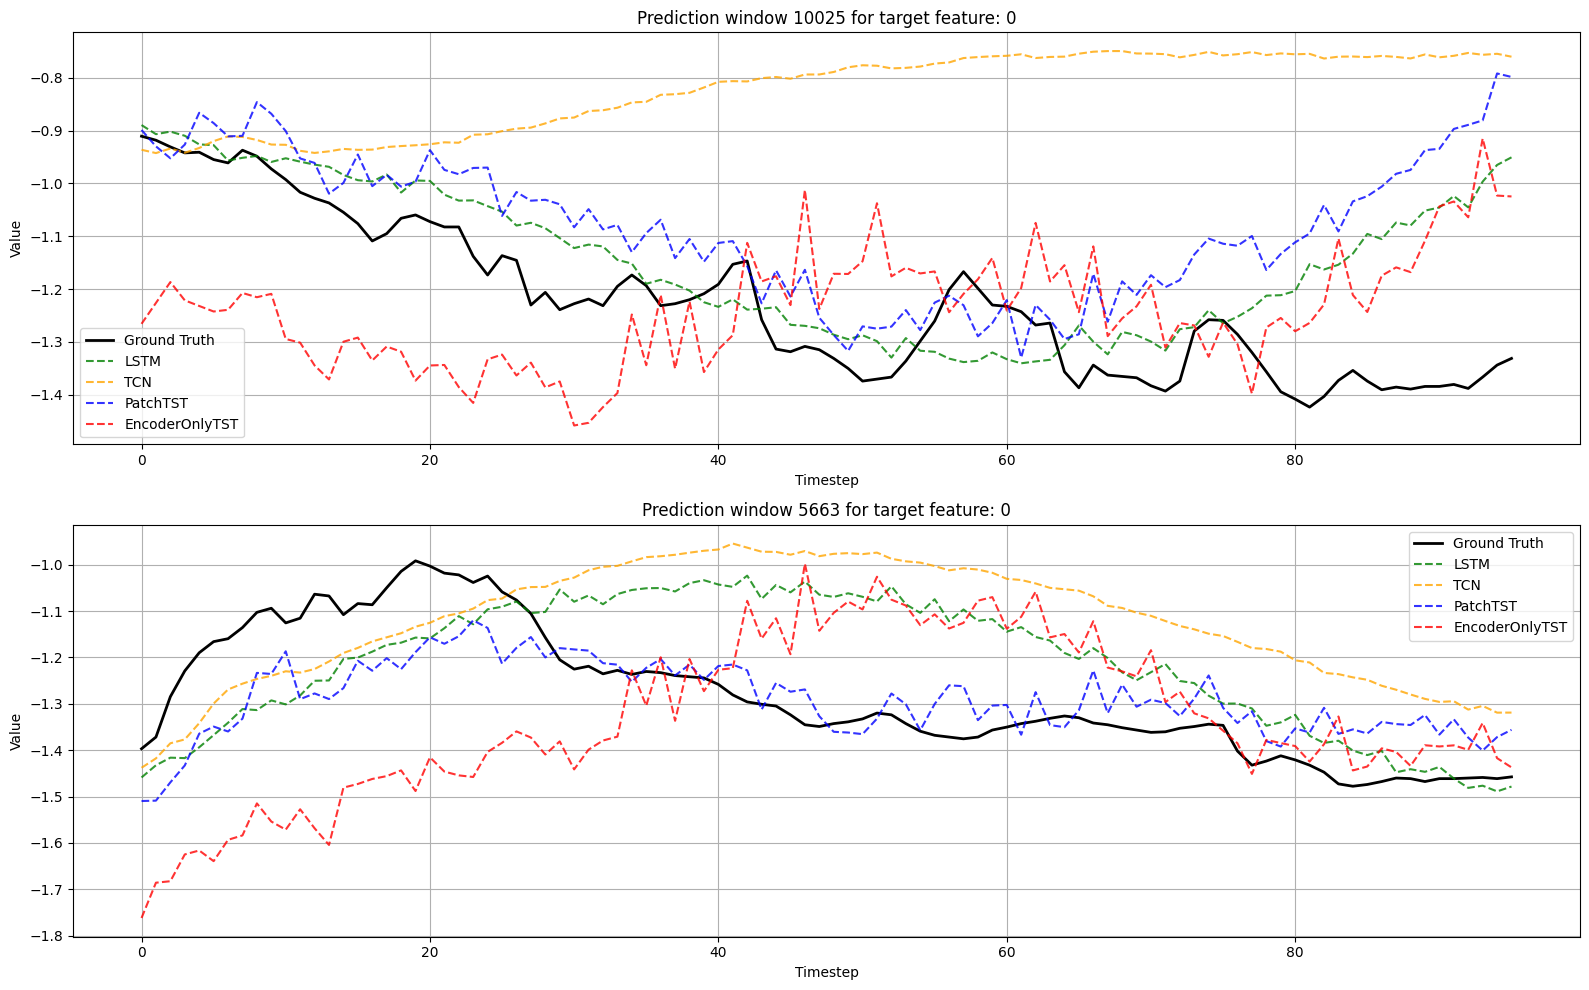

In [36]:
compare_models(
    Y_true=Y_true_PatchTST,
    model_preds={
        "LSTM": y_pred_lstm,
        "TCN": y_pred_tcn,
        "PatchTST": Y_pred_PatchTST,
        "EncoderOnlyTST": Y_pred_encoder
    },
    target_idx=target_idx,
    model_types={
        "LSTM": "univariate",
        "TCN": "univariate",
        "PatchTST": "multivariate",
        "EncoderOnlyTST": "multivariate"
    },
    model_params={
        "LSTM": lstm_num_params,
        "TCN": tcn_num_params,
        "PatchTST": PatchTST_num_params,
        "EncoderOnlyTST": EncoderOnlyTST_num_params
    },
    training_times={
        "LSTM": lstm_training_time,
        "TCN": tcn_training_time,
        "PatchTST": PatchTST_training_time,
        "EncoderOnlyTST": EncoderOnlyTST_training_time
    },
    model_colors={
        "LSTM": "green",
        "TCN": "orange",
        "PatchTST": "blue",
        "EncoderOnlyTST": "red"
    },
    num_windows_to_plot=2
)
